## **Import Important Libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from flask import Flask, request, jsonify
import requests

## **Read the Dataset**

In [2]:
#read the train data as a csv file
train_df = pd.read_csv("train - train.csv")
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [54]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [3]:
#read the test data as a csv file
test_df = pd.read_csv("test - test.csv")
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## **Explore the Training Data**

In [4]:
#for more information about the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#check for missing values
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
#Fill missing values with the mean of each column
train_df.fillna(train_df.mean(), inplace=True)

# Ensure all missing values are handled
print(train_df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


## **Exploratory Data Analysis**

Text(0, 0.5, 'Count')

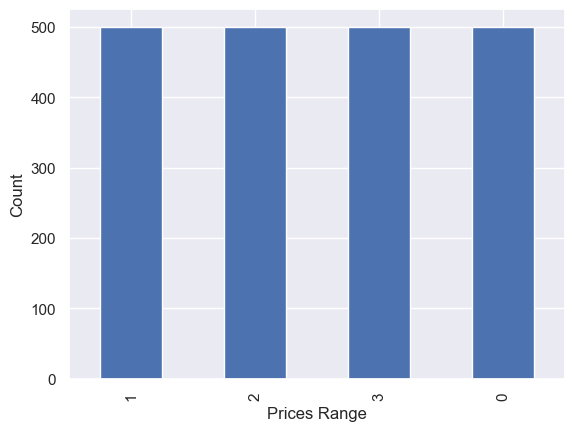

In [14]:
#plot the prices range bar plot
price_plot=train_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Prices Range')
plt.ylabel('Count')

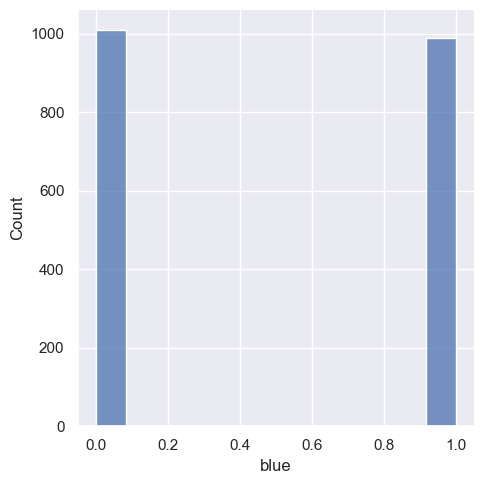

In [13]:
#count the devices which have Bluetooth 
sns.displot(data=train_df["blue"])

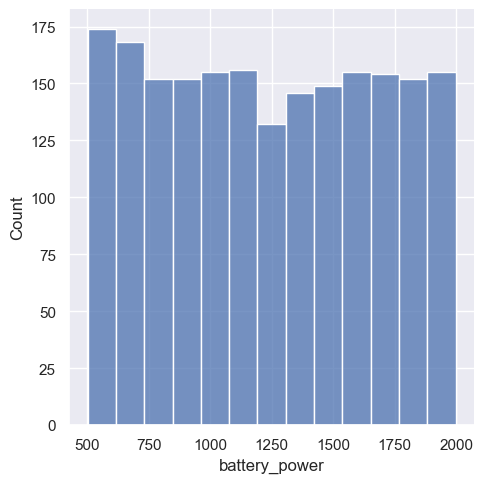

In [12]:
#visualize the distribution plot for battery power
sns.displot(data=train_df["battery_power"])

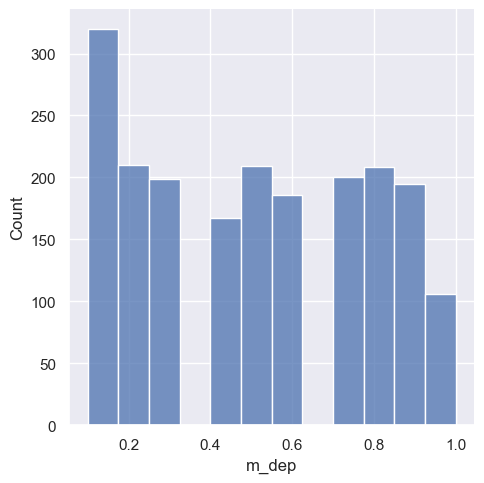

In [15]:
#analyse the mobile depth
sns.displot(data=train_df["m_dep"])

In [17]:
#calculate the correlation between the data column
train_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033480,0.015018,-0.004949,0.033344,0.000687,-0.029669,...,0.012014,-0.007829,-0.000705,-0.029314,-0.021284,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003425,0.013850,0.041139,0.002315,-0.009108,0.037246,...,-0.007839,-0.041429,0.026318,-0.003637,0.000470,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,0.002113,-0.040104,0.007122,-0.014507,0.011533,-0.005384,...,-0.014376,-0.010162,0.003506,-0.029819,-0.007531,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.028384,0.004637,-0.015400,-0.022900,-0.008019,-0.023346,...,-0.018894,0.013775,0.041117,-0.012618,-0.016805,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033480,0.003425,0.002113,-0.028384,1.000000,-0.018446,-0.026776,-0.001283,0.024774,-0.014137,...,-0.010631,-0.002475,0.018594,-0.011160,-0.011929,-0.005811,0.000729,-0.015683,0.019317,0.024963
four_g,0.015018,0.013850,-0.040104,0.004637,-0.018446,1.000000,0.008239,-0.001699,-0.015756,-0.030260,...,-0.016000,0.009226,0.007979,0.027482,0.036346,-0.046439,0.583521,0.015342,-0.019076,0.015472
int_memory,-0.004949,0.041139,0.007122,-0.015400,-0.026776,0.008239,1.000000,0.005293,-0.034739,-0.027820,...,0.012880,-0.008795,0.030658,0.039083,0.010839,-0.003027,-0.009525,-0.027111,0.006921,0.042527
m_dep,0.033344,0.002315,-0.014507,-0.022900,-0.001283,-0.001699,0.005293,1.000000,0.021540,-0.002832,...,0.022658,0.022481,-0.009804,-0.026484,-0.019665,0.018076,-0.011103,-0.000903,-0.026654,-0.000083
mobile_wt,0.000687,-0.009108,0.011533,-0.008019,0.024774,-0.015756,-0.034739,0.021540,1.000000,-0.019294,...,-0.001294,-0.001207,-0.004480,-0.035864,-0.020960,0.005275,0.003747,-0.012262,0.001713,-0.032424
n_cores,-0.029669,0.037246,-0.005384,-0.023346,-0.014137,-0.030260,-0.027820,-0.002832,-0.019294,1.000000,...,-0.008178,0.024837,0.004810,-0.000450,0.026454,0.012206,-0.014583,0.023363,-0.010383,0.004594


<Axes: >

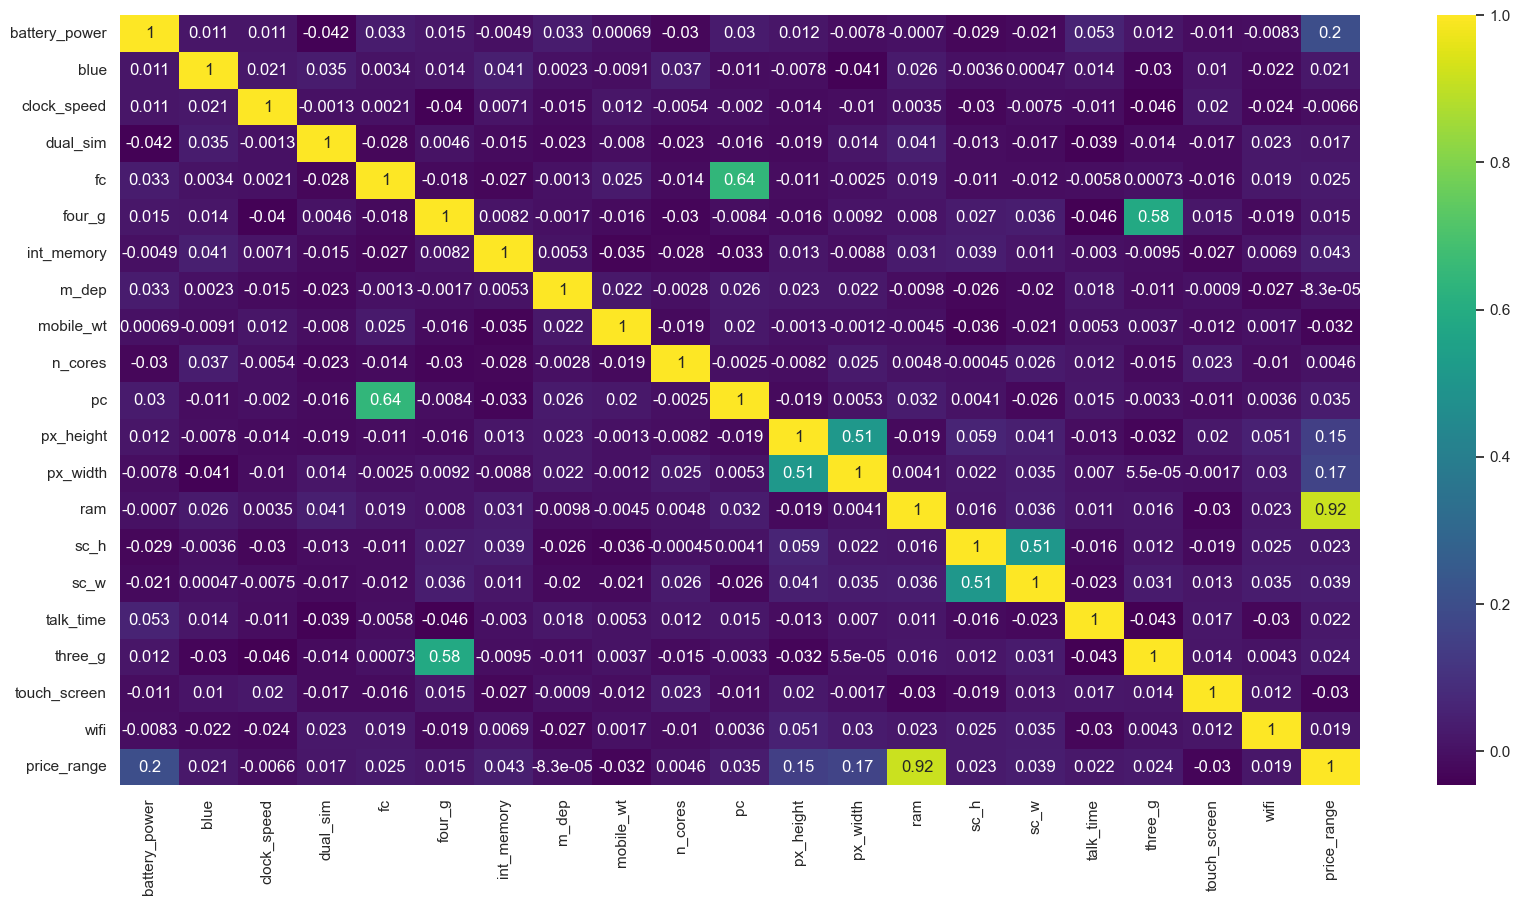

In [18]:
fig=plt.subplots(figsize=(20,10))
#visualize the data correlation
sns.heatmap(train_df.corr(), cmap='viridis', annot=True)

## **Split the Dataset into train and test dataset**

In [21]:
#split the data into features (x) and target (y)
x = train_df.drop("price_range",axis=1)
y = train_df["price_range"]

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

## **Model Training**

In [25]:
#define a function for model evaluation
def model_evaluation(y_test, y_pred, plt_title):
    #define confusion matrix 
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [35]:
#train and fit random forest classsifier
RF_Model=RandomForestClassifier()

RF_Model.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
#predict using test data
Y_pred_RF=RF_Model.predict(x_test)

In [37]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,Y_pred_RF))

Random Forest Classifier Accuracy Score:  0.8825


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.86      0.86        91
           2       0.78      0.84      0.81        92
           3       0.93      0.87      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



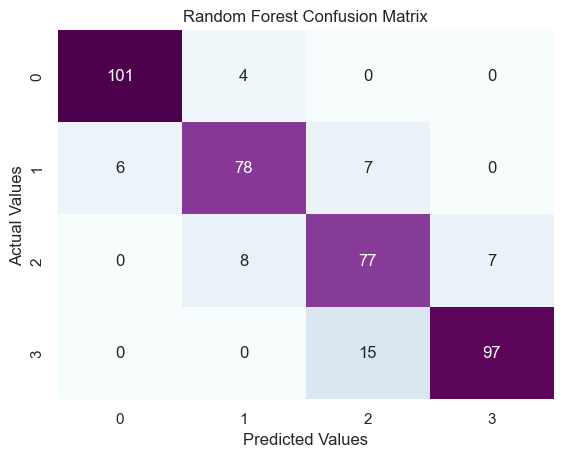

In [38]:
RF_CM =model_evaluation(y_test, Y_pred_RF, 'Random Forest Confusion Matrix')

## **Model Optimization Using GridSearchCV**

In [39]:
#define the model parameters for grid search
params= {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 4, 6],
    'max_depth': [None, 10, 20]
}

In [40]:
#define grid search
GS_Model = GridSearchCV(RF_Model, params, cv=5)
#fit grid search on the training data
GS_Model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]})

In [42]:
#use the best parameters found during optimization to train the model
Best_Parameters_Model = GS_Model.best_estimator_
#fit the best model parameters on the training data
Best_Parameters_Model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=6)

In [43]:
#predict using test data
Y_pred_GS=Best_Parameters_Model.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.90      0.89      0.90        91
           2       0.80      0.89      0.84        92
           3       0.95      0.86      0.90       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



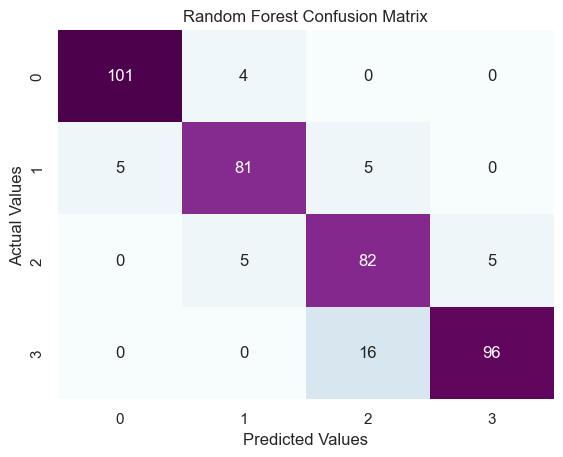

In [44]:
#evaluate the model
GS_CM =model_evaluation(y_test, Y_pred_GS, 'Random Forest Confusion Matrix')

In [47]:
#Save the trained model using joblib for deployment
joblib.dump(Best_Parameters_Model, 'model.joblib')

['model.joblib']